# Perform simple linear regression

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
placement = pd.read_csv("placement.csv")
placement.head(1)

,cgpa,package
0,6.89,3.26


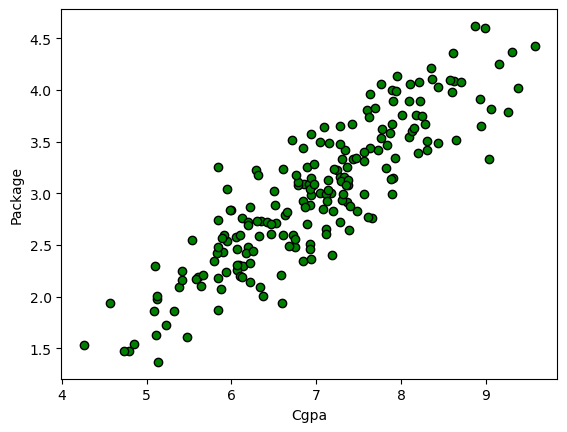

In [68]:
plt.scatter(placement["cgpa"], placement["package"], color = "green", ec = "black")
plt.xlabel("Cgpa")
plt.ylabel("Package")
plt.show()

In [69]:
a = placement.iloc[:,0:1]
b = placement.iloc[:,-1]
len(a)

200

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
a_train,a_test,b_train,b_test = train_test_split(a,b,test_size=.2, random_state=2)

lr = LinearRegression()
lr.fit(a_train,b_train)

LinearRegression()

In [74]:
actual_values = b_test.values
predicted_values = np.round(lr.predict(a_test),2)
print(f"actual values (10) == {actual_values[:10]}")
print("===========")
print(f"predicted values (10) == {predicted_values[:10]}")

actual values (10) == [4.1  3.49 2.08 2.33 1.94 1.48 1.86 3.09 4.21 2.87]
predicted values (10) == [3.89 3.09 2.38 2.57 1.65 1.78 2.07 2.93 3.76 2.94]


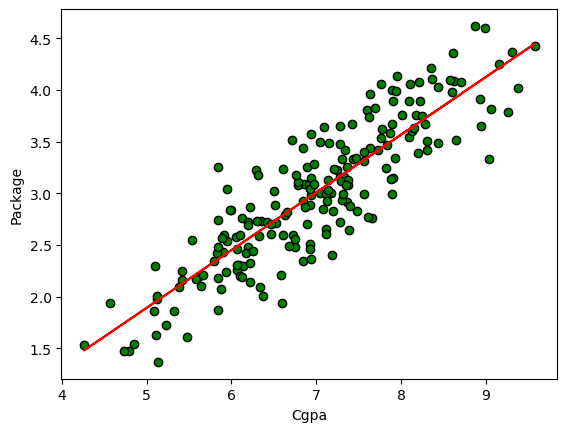

In [76]:
plt.scatter(placement["cgpa"], placement["package"], color = "green", ec = "black")
plt.plot(a_train,lr.predict(a_train), color = "red")
plt.xlabel("Cgpa")
plt.ylabel("Package")
plt.show()

In [77]:
m = lr.coef_
b = lr.intercept_
print(m)
print(b)

[0.55795197]
-0.8961119222429144


In [78]:
# y = m*x + b
m * 4.79 + b

array([1.77647803])

# Linear Regression from scratch

In [79]:
class MeraLinearRegression():
    
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self,x_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(x_train.shape[0]):
            
            num = num + ((x_train[i] - x_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((x_train[i] - x_train.mean()) * (x_train[i] - x_train.mean()))            
        self.m = num/den
        self.b = y_train.mean() - (self.m * x_train.mean())
        
    def predict(self,x_test):
        
        return self.m * x_test + self.b
    
    

In [80]:
mr = MeraLinearRegression()

In [81]:
x = placement.iloc[:,0].values
y = placement.iloc[:,1].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state = 2)

In [82]:
mr.fit(x_train,y_train)
mr.predict(x_test[1])
lr.predict(a_test.iloc[1].values.reshape(1,1))

C:\Users\rawat\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([3.09324469])

In [83]:
print(mr.m)
print(lr.coef_)
print(mr.b)
print(lr.intercept_)

0.5579519734250721
[0.55795197]
-0.8961119222429152
-0.8961119222429144


# Multiple Linear Regression

In [84]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go 
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score


In [85]:
x,y = make_regression(n_samples= 100, n_features= 2, n_informative= 2, n_targets= 1, noise = 50)
df = pd.DataFrame({"feature1": x[:,0], "feature2":x[:,1], "target": y})
df.shape
df.head()

,feature1,feature2,target
0,0.258989,-0.480943,-25.746077
1,-0.703979,0.496104,-60.482548
2,-0.479248,1.434763,-20.767579
3,-0.333207,0.903558,9.996543
4,-1.316184,0.321086,-38.082180


In [86]:
fig = px.scatter_3d(df, x = "feature1", y = "feature2", z = "target")
fig.show()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= .2, random_state= 3)

In [87]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [88]:
y_pred = lr.predict(x_test)

print("MAE", mean_absolute_error(y_test,y_pred))
print("MSE", mean_squared_error(y_test,y_pred))
print("R2 Score", r2_score(y_test,y_pred))

MAE 22.60727807061233
MSE 894.8662225645212
R2 Score 0.9135826538445299


In [90]:
a = np.linspace(-5,5,10)
b = np.linspace(-5,5,10)

xgrid, ygrid = np.meshgrid(b,a)

final = np.vstack((xgrid.ravel().reshape(1,100), ygrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)
z = z_final

In [91]:
fig = px.scatter_3d(df, x = "feature1",y = "feature2", z = "target")
fig.add_trace(go.Surface(x = a, y = b, z = z))
fig.show()

lr.coef_
lr.intercept_

-2.709275649614774

In [92]:
import numpy as np
from sklearn.datasets import load_diabetes

x,y = load_diabetes(return_X_y= True)
x.shape

(442, 10)

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= .2, random_state= 2)
y_train.shape

lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
r2_score = r2_score(y_test,y_pred)

print(lr.coef_, lr.intercept_, sep = "\n")
print("------>>")
print(r2_score)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167
------>>
0.4399338661568968


## Multiple Linear Regression from scratch

In [96]:
class MultiLinear:
    
    def __init__(self):
        self.coef = None
        self.intercept = None
        
    def fit(self,x_train,y_train):
        x_train = np.insert(x_train,0,1,axis = 1)
        
        betas = np.linalg.inv(np.dot(x_train.T,x_train)).dot(x_train.T).dot(y_train)
        self.coef = betas[1:]
        self.intercept = betas[0]
    
    def predict(self,x_test):
        y_pred = np.dot(x_test,self.coef) + self.intercept
        return y_pred

In [101]:
mr = MultiLinear()
mr.fit(x_train,y_train)
y_predicted = mr.predict(x_test)